# データ分析入門

# 第１１章　多変量データと確率ベクトル #13


### パッケージ読み込み

In [1]:
# !pip install japanize_matplotlib

In [2]:
# !pip install japanize_matplotlib
# !pip install sympy

%matplotlib inline
import japanize_matplotlib
from matplotlib import pyplot as plt

import pandas as pd
from pathlib import Path
import math
import numpy as np

import sympy as sym


### 正規分布の数値計算

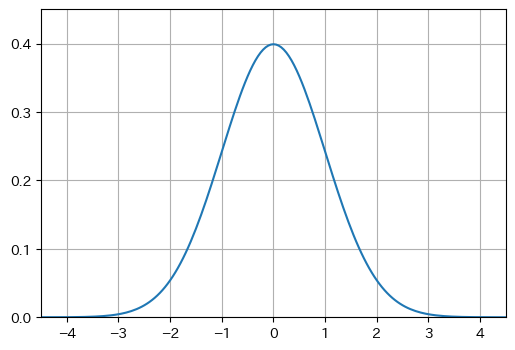

In [3]:
# https://rinsaka.com/python/statistics/01-norm.html
# 横軸用のnumpy配列を準備

from scipy.stats import norm
from scipy.stats import t

x_step = 0.05
x_min = -5
x_max = x_step + 5
x = np.arange(x_min, x_max, x_step)
 
# 標準正規分布
y = norm.pdf(x)
 
# グラフを描く
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(0, 0.45)
ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(0.0, 0.5, 0.1))
ax.grid()
# plt.savefig('normal.png', dpi=300, facecolor='white')
plt.show()

In [5]:
# # http://y-okamoto-psy1949.la.coocan.jp/Python/misc/Bysn2VarNorm/
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# class BiVarNorm:

#     # """

#     #         Bivariate normal distribution

#     # """

#     def __init__(self, rho):

#         self.rho = rho

 

#     def value(self, x, y):

#         v = (x**2 + y**2 - 2 * self.rho * x * y) / (2.0 * (1.0 - self.rho**2))

#         v = np.exp(-v) / ((2.0 * math.pi * (1.0 - self.rho**2)) ** 0.5)

#         return v


# while True:

#     rho = float(input('rho = '))

#     if math.fabs(rho) >= 1.0:

#         break

#     fig, ax = plt.subplots(1, 1, figsize=(6, 4))


#     ax = Axes3D(fig)

#     Xg = np.arange(-4.0, 4.0, 0.1)

#     Yg = np.arange(-4.0, 4.0, 0.1)

#     X, Y = np.meshgrid(Xg, Yg)

#     bi_norm = BiVarNorm(rho)

 

#     ax.plot_surface(X, Y, bi_norm.value(X, Y), rstride = 1, cstride = 1, cmap = plt.cm.coolwarm)


#     plt.show()

In [ ]:
# https://qiita.com/g-k/items/698c7f9e4a213d73197b
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#関数に投入するデータを作成
x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()]

#二次元正規分布の確率密度を返す関数
def gaussian(x):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    print(det)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    print(inv)
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

#2変数の平均値を指定
mu = np.array([0,0])
#2変数の分散共分散行列を指定
sigma = np.array([[1,0],[0,1]])

Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()


In [ ]:
#2変数の平均値を指定
mu = np.array([3,1])
#2変数の分散共分散行列を指定
sigma = np.array([[10,5],[5,10]])

Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

### 問題11.1

In [6]:
df1_1 = pd.read_excel('Table1_1.xlsx', index_col=0)
df1_1

,x,y,z
No.,,,
1,178,100,33
2,185,90,22
3,190,90,29
4,175,79,27
5,185,81,29
...,...,...,...
79,180,96,23
80,175,79,30
81,185,82,23


In [10]:
# df1_1['x']

df1_1=df1_1.loc[:, ['y', 'z', 'x']]
df1_1

,y,z,x
No.,,,
1,100,33,178
2,90,22,185
3,90,29,190
4,79,27,175
5,81,29,185
...,...,...,...
79,96,23,180
80,79,30,175
81,82,23,185


In [11]:
df1_1_np=df1_1.to_numpy()
df1_1_np


array([[100,  33, 178],
       [ 90,  22, 185],
       [ 90,  29, 190],
       [ 79,  27, 175],
       [ 81,  29, 185],
       [106,  30, 196],
       [100,  31, 188],
       [ 87,  23, 186],
       [ 84,  19, 188],
       [ 77,  31, 182],
       [ 82,  19, 180],
       [ 82,  30, 176],
       [ 85,  25, 186],
       [ 88,  31, 178],
       [ 77,  26, 177],
       [ 77,  35, 180],
       [108,  25, 187],
       [ 68,  26, 175],
       [ 78,  39, 177],
       [105,  25, 193],
       [ 96,  24, 186],
       [ 78,  32, 174],
       [ 85,  26, 178],
       [ 81,  18, 177],
       [ 81,  27, 175],
       [ 86,  18, 182],
       [ 80,  19, 183],
       [ 93,  27, 179],
       [ 74,  24, 173],
       [ 84,  24, 182],
       [ 89,  27, 180],
       [ 80,  27, 178],
       [ 85,  23, 178],
       [ 69,  24, 168],
       [ 90,  18, 189],
       [ 74,  24, 174],
       [ 72,  20, 172],
       [ 74,  25, 184],
       [ 88,  28, 185],
       [ 72,  29, 173],
       [ 75,  18, 172],
       [ 78,  25

In [12]:
df1_1.cov()

,y,z,x
y,71.173964,-1.345137,28.614605
z,-1.345137,24.780782,-3.499412
x,28.614605,-3.499412,29.171907


In [13]:
df1_1.corr()

,y,z,x
y,1.000000,-0.032029,0.627978
z,-0.032029,1.000000,-0.130153
x,0.627978,-0.130153,1.000000


In [ ]:
df1_2 = pd.read_excel('Table1_2.xlsx', index_col=0)
df1_2

### 問題11.2

In [ ]:
Data=np.array([[1,0,0,0,0,0],[2,1,0,0,0,0],[2,2,1,0,0,0],[2,2,2,1,0,0],[2,2,2,2,1,0],[2,2,2,2,2,1]])
Data


In [ ]:
mat1=Data/(6*6)
mat1a=Data
mat1

In [ ]:
np.arange(1,7)

In [ ]:
np.sum(mat1a,axis=1)

In [ ]:
np.sum(np.sum(mat1a,axis=1)*np.arange(1,7))

In [ ]:
np.sum(mat1a,axis=1)*np.arange(1,7)

In [ ]:
np.sum(np.sum(mat1a,axis=1)*np.arange(1,7))

In [ ]:
np.sum(mat1a,axis=0)*np.arange(1,7)

In [ ]:
np.sum(np.sum(mat1a,axis=0)*np.arange(1,7))

In [ ]:
np.sum(mat1a,axis=1)*(np.arange(1,7))**2

In [ ]:
np.sum(np.sum(mat1a,axis=1)*(np.arange(1,7))**2)

In [ ]:
np.sum(mat1a,axis=0)*(np.arange(1,7))**2

In [ ]:
np.sum(np.sum(mat1a,axis=0)*(np.arange(1,7))**2)

In [ ]:
df1=pd.DataFrame(mat1)
df1

In [ ]:
df1.cov()

In [ ]:
np.sum(mat1a,axis=1)

In [ ]:
data=np.array([np.sum(mat1a,axis=1),np.flip(np.sum(mat1a,axis=1))])
data

In [ ]:
df1=pd.DataFrame(data.T)
df1.cov()

In [ ]:
df1.corr()

### 問題*

### 問題*

### 問題*

### 問題*

### その他